## ဖရုံသီးဈေးနှုန်းအတွက် လိုင်းနီယာနှင့် ပေါလီနိုမီယာ ရေဂရက်ရှင်း - သင်ခန်းစာ ၃

လိုအပ်သော လိုက်ဘရရီများနှင့် ဒေတာစနစ်ကို load လုပ်ပါ။ ဒေတာကို အောက်ပါအချက်များပါဝင်သော dataframe အဖြစ် ပြောင်းပါ။

- bushel အလိုက်ဈေးနှုန်းထားသော ဖရုံသီးများကိုသာ ရယူပါ
- ရက်စွဲကို လပြောင်းပါ
- ဈေးနှုန်းကို အမြင့်နှင့် အနိမ့်ဈေးနှုန်းများ၏ ပျမ်းမျှတန်ဖိုးအဖြစ်တွက်ချက်ပါ
- bushel အရေအတွက်အလိုက် ဈေးနှုန်းကို ပြောင်းလဲပါ


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

<AxesSubplot:xlabel='Month', ylabel='Price'>

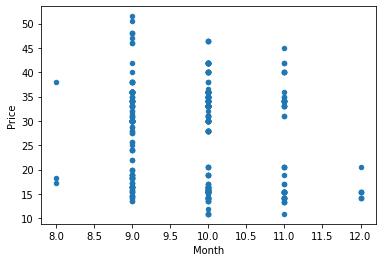

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

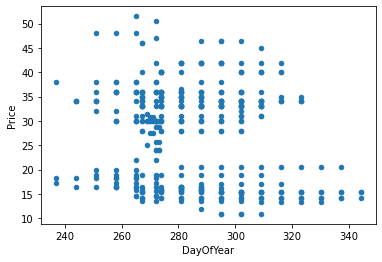

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


အချင်းချင်းဆက်စပ်မှုက တော်တော်ငယ်သလိုပဲ၊ ဒါပေမယ့် အခြားအရေးကြီးတဲ့ဆက်စပ်မှုတစ်ခုရှိနေတယ်လို့ပုံရတယ် - အထက်ပါပုံတွင် စျေးနှုန်းအချက်များမှာ သီးခြားအုပ်စုအချို့ရှိနေသလိုပဲ။ အမျိုးမျိုးသောဖရုံသီးအမျိုးအစားများကို ပြသမယ့်ပုံတစ်ခု ပြုလုပ်ကြည့်ရအောင်:


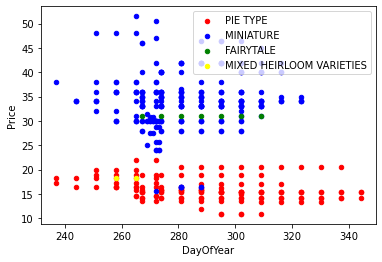

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

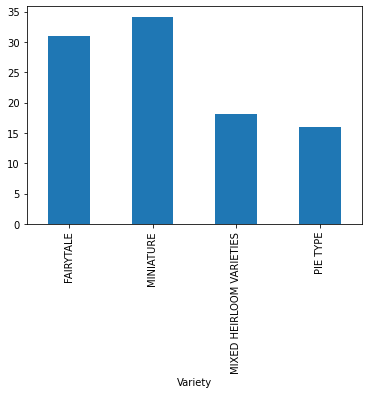

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

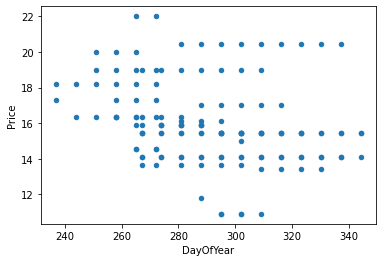

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### လိုင်းနာ ရေဂရက်ရှင်း

ကျွန်တော်တို့ Scikit Learn ကို အသုံးပြုပြီး လိုင်းနာ ရေဂရက်ရှင်း မော်ဒယ်ကို လေ့ကျင့်သွားမယ်။


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


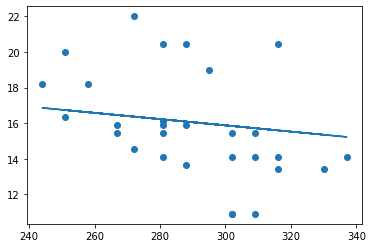

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### ပိုလီနိုမီယာ ရီဂရက်ရှင်း

တစ်ခါတစ်ရံမှာ အင်္ဂါရပ်တွေ (features) နဲ့ ရလဒ်တွေ (results) အကြား ဆက်နွယ်မှုဟာ သဘာဝအတိုင်း မတည့်တည့် ဖြစ်တတ်ပါတယ်။ ဥပမာ၊ ဖရုံစျေးနှုန်းတွေဟာ ဆောင်းရာသီ (လ=1,2) မှာ မြင့်တက်ပြီး နွေရာသီ (လ=5-7) မှာ ကျဆင်းပြီး နောက်ထပ် မြင့်တက်လာနိုင်ပါတယ်။ Linear regression က ဒီဆက်နွယ်မှုကို တိကျစွာ ရှာဖွေမရနိုင်ပါ။

ဒီလိုအခြေအနေမှာ အပိုအင်္ဂါရပ်တွေ ထည့်သွင်းစဉ်းစားနိုင်ပါတယ်။ ရိုးရှင်းတဲ့နည်းလမ်းကတော့ input အင်္ဂါရပ်တွေကို ပိုလီနိုမီယာ (polynomials) အဖြစ် ပြောင်းလဲပြီး **ပိုလီနိုမီယာ ရီဂရက်ရှင်း** ကို ရလဒ်အဖြစ် ရရှိစေမှာ ဖြစ်ပါတယ်။ Scikit Learn မှာတော့ pipelines ကို အသုံးပြုပြီး ပိုလီနိုမီယာ အင်္ဂါရပ်တွေကို အလိုအလျောက် ကြိုတင်တွက်ချက်နိုင်ပါတယ်။


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


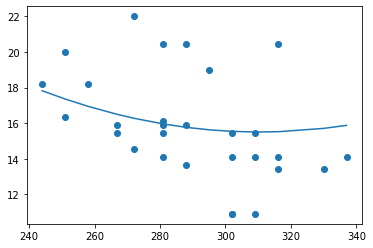

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### အမျိုးအစားများကို Encode လုပ်ခြင်း

အကောင်းဆုံးကမ္ဘာမှာတော့ တူညီတဲ့မော်ဒယ်တစ်ခုကို အသုံးပြုပြီး ဖရုံမျိုးစုံအတွက် စျေးနှုန်းတွေကို ခန့်မှန်းနိုင်ချင်ပါတယ်။ အမျိုးအစားကို ထည့်သွင်းစဉ်းစားဖို့အတွက် အရင်ဆုံး အမျိုးအစားကို ကိန်းဂဏန်းပုံစံ (numeric form) သို့မဟုတ် **encode** လုပ်ဖို့လိုပါတယ်။ ဒါကို လုပ်နိုင်တဲ့နည်းလမ်းအမျိုးမျိုးရှိပါတယ်-

* ရိုးရှင်းတဲ့ ကိန်းဂဏန်း encode လုပ်နည်းက အမျိုးအစားအမျိုးမျိုးကို စာရင်းတစ်ခုထဲမှာ တည်ဆောက်ပြီး၊ အဲ့ဒီစာရင်းထဲက အမျိုးအစားနာမည်ကို အညွှန်း (index) နံပါတ်နဲ့ အစားထိုးပေးမှာဖြစ်ပါတယ်။ ဒါပေမယ့် ဒီနည်းလမ်းက linear regression အတွက် အကောင်းဆုံးမဟုတ်ပါဘူး၊ အကြောင်းကတော့ linear regression က အညွှန်းနံပါတ်ရဲ့ ကိန်းဂဏန်းတန်ဖိုးကို သက်ဆိုင်အောင် သုံးတတ်ပြီး၊ အဲ့ဒီကိန်းဂဏန်းတန်ဖိုးက စျေးနှုန်းနဲ့ တိုက်ရိုက်ဆက်နွယ်မှု မရှိနိုင်တဲ့ အခွင့်အလမ်းများ ရှိနိုင်ပါတယ်။
* One-hot encoding ကတော့ `Variety` ကော်လံကို အမျိုးအစားတစ်ခုစီအတွက် ကော်လံ ၄ ခုအဖြစ် အစားထိုးပေးမှာဖြစ်ပြီး၊ အဲ့ဒီကော်လံတွေမှာ အတန်းတစ်ခုဟာ အချို့အမျိုးအစားနဲ့ ကိုက်ညီရင် 1 ဖြစ်ပြီး၊ မဟုတ်ရင် 0 ဖြစ်ပါမယ်။

အောက်မှာပါတဲ့ ကုဒ်က အမျိုးအစားတစ်ခုကို one-hot encode လုပ်နိုင်တဲ့ နည်းလမ်းကို ပြသထားပါတယ်-


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### အမျိုးအစားအပေါ် Linear Regression

ယခုအခါတွင် အထက်ပါကုဒ်တူတူကို အသုံးပြုမည်ဖြစ်ပြီး၊ သို့သော် `DayOfYear` အစား၊ one-hot-encoded အမျိုးအစားကို input အဖြစ် အသုံးပြုမည်:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


ကျွန်ုပ်တို့သည် အခြားအင်္ဂါရပ်များကိုလည်း အတူတူပုံစံဖြင့် အသုံးပြုကြည့်နိုင်ပြီး၊ `Month` သို့မဟုတ် `DayOfYear` ကဲ့သို့သော ကိန်းဂဏန်းအင်္ဂါရပ်များနှင့် ပေါင်းစပ်နိုင်ပါသည်။


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### ပေါလီနိုမီးယား ပြန်လည်သုံးသပ်မှု

ပေါလီနိုမီးယား ပြန်လည်သုံးသပ်မှုကို တစ်ခုတည်းသော hot-encoded အမျိုးအစားအချက်အလက်များနှင့်လည်း အသုံးပြုနိုင်ပါသည်။ ပေါလီနိုမီးယား ပြန်လည်သုံးသပ်မှုကို လေ့ကျင့်ရန် ကုဒ်သည် အထက်တွင် မြင်ခဲ့သည့်အတိုင်း အခြေခံအားဖြင့် တူညီနေပါမည်။


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်မှုများတွင် အမှားများ သို့မဟုတ် မမှန်ကန်မှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်ရန် လိုအပ်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူကောင်းမွန်သော ပရော်ဖက်ရှင်နယ်ဘာသာပြန်ဝန်ဆောင်မှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်မှုကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပါယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
